In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
retail_df = pd.read_excel('/content/drive/MyDrive/SSU_데이터_사이언스/Week14/Offline/Online_Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
temp_df = retail_df.copy()

In [8]:
temp_df['date'] = temp_df['InvoiceDate'].dt.date
temp_df['date']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: date, Length: 541909, dtype: object

In [9]:
df2 = temp_df.groupby('date')[['Quantity']].sum()
df2

,Quantity
date,
2010-12-01,26814
2010-12-02,21023
2010-12-03,14830
2010-12-05,16395
2010-12-06,21419
...,...
2011-12-05,44119
2011-12-06,29026
2011-12-07,39612


In [10]:
temp_df['amount'] = temp_df['Quantity'] * temp_df['UnitPrice']

In [11]:
temp_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60


In [39]:
rfm_Df = temp_df.groupby('CustomerID')[['amount']].sum()

In [40]:
rfm_Df2 = rfm_Df.rename(columns = {'amount' : 'Monetary'})
rfm_Df2

,Monetary
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [41]:
rfm_Df2['Frequency'] = temp_df.groupby('CustomerID')[['InvoiceNo']].count()
rfm_Df2

,Monetary,Frequency
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17
...,...,...
18280.0,180.60,10
18281.0,80.82,7
18282.0,176.60,13


In [15]:
import datetime

In [42]:
temp_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [43]:
temp_df.groupby('CustomerID')[['date']].max()

,date
CustomerID,
12346.0,2011-01-18
12347.0,2011-12-07
12348.0,2011-09-25
12349.0,2011-11-21
12350.0,2011-02-02
...,...
18280.0,2011-03-07
18281.0,2011-06-12
18282.0,2011-12-02


In [44]:
rfm_Df2['Days'] = datetime.date(2011, 12, 9) - temp_df.groupby('CustomerID')['date'].max()

In [45]:
rfm_Df2['Days'] = rfm_Df2['Days'].dt.days

In [46]:
rfm_Df2

,Monetary,Frequency,Days
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,2
12348.0,1797.24,31,75
12349.0,1757.55,73,18
12350.0,334.40,17,310
...,...,...,...
18280.0,180.60,10,277
18281.0,80.82,7,180
18282.0,176.60,13,7


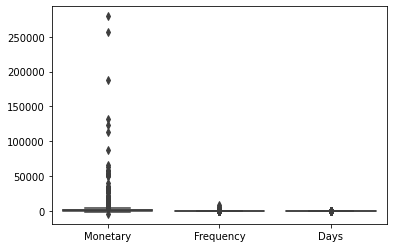

In [47]:
sns.boxplot(data = rfm_Df2)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(rfm_Df2)
scaled_data

array([[-0.23100099, -0.3917197 ,  2.31656788],
       [ 0.29343167,  0.38265697, -0.88904975],
       [-0.01231622, -0.26695902, -0.16456032],
       ...,
       [-0.20951263, -0.34439668, -0.83942719],
       [ 0.02390005,  2.85205812, -0.87912524],
       [-0.00744423, -0.0991774 , -0.49206924]])

In [49]:
scaled_df = pd.DataFrame(scaled_data)
scaled_df

,0,1,2
0,-0.231001,-0.391720,2.316568
1,0.293432,0.382657,-0.889050
2,-0.012316,-0.266959,-0.164560
3,-0.017146,-0.086271,-0.730258
4,-0.190312,-0.327188,2.167700
...,...,...,...
4367,-0.209026,-0.357303,1.840191
4368,-0.221167,-0.370209,0.877514
4369,-0.209513,-0.344397,-0.839427
4370,0.023900,2.852058,-0.879125


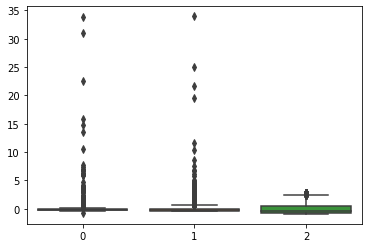

In [50]:
sns.boxplot(data = scaled_df)

In [24]:
rfm_Df2

,Monetary,Frequency,Days
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,2
12348.0,1797.24,31,75
12349.0,1757.55,73,18
12350.0,334.40,17,310
...,...,...,...
18280.0,180.60,10,277
18281.0,80.82,7,180
18282.0,176.60,13,7


In [51]:
rfm_Df3 = rfm_Df2.copy()

rfm_Df3['Monetary_log'] = np.log1p(rfm_Df3['Monetary'])
rfm_Df3['Frequency_log'] = np.log1p(rfm_Df3['Frequency'])
rfm_Df3['Recency_log'] = np.log1p(rfm_Df3['Days'])

In [52]:
rfm_Df3

,Monetary,Frequency,Days,Monetary_log,Frequency_log,Recency_log
CustomerID,,,,,,
12346.0,0.00,2,325,0.000000,1.098612,5.786897
12347.0,4310.00,182,2,8.368925,5.209486,1.098612
12348.0,1797.24,31,75,7.494564,3.465736,4.330733
12349.0,1757.55,73,18,7.472245,4.304065,2.944439
12350.0,334.40,17,310,5.815324,2.890372,5.739793
...,...,...,...,...,...,...
18280.0,180.60,10,277,5.201806,2.397895,5.627621
18281.0,80.82,7,180,4.404522,2.079442,5.198497
18282.0,176.60,13,7,5.179534,2.639057,2.079442


In [67]:
rfm_Df3.isna().sum()

Monetary          0
Frequency         0
Days              0
Monetary_log     41
Frequency_log     0
Recency_log       0
dtype: int64

In [69]:
rfm_Df3 = rfm_Df3.fillna(0)

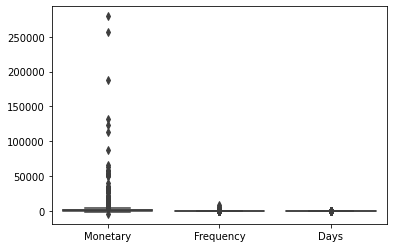

In [54]:
sns.boxplot(data = rfm_Df3[['Monetary', 'Frequency', 'Days']])

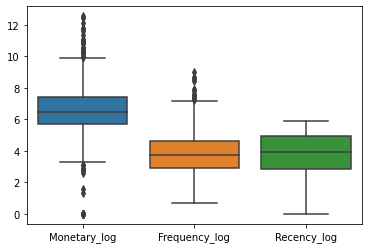

In [53]:
sns.boxplot(data = rfm_Df3[['Monetary_log', 'Frequency_log', 'Recency_log']])

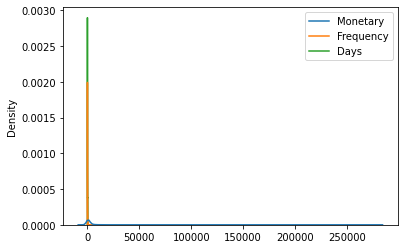

In [55]:
sns.kdeplot(data = rfm_Df3[['Monetary', 'Frequency', 'Days']])

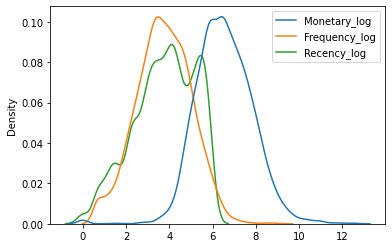

In [56]:
sns.kdeplot(data = rfm_Df3[['Monetary_log', 'Frequency_log', 'Recency_log']])

In [70]:
scaled_data2 = scaler.fit_transform(rfm_Df3)
scaled_data2

array([[-0.23100099, -0.3917197 ,  2.31656788, -4.51742307, -2.09404123,
         1.4289457 ],
       [ 0.29343167,  0.38265697, -0.88904975,  1.30781443,  1.16181962,
        -1.88947218],
       [-0.01231622, -0.26695902, -0.16456032,  0.69921019, -0.21925126,
         0.39825735],
       ...,
       [-0.20951263, -0.34439668, -0.83942719, -0.91217938, -0.87399049,
        -1.19523084],
       [ 0.02390005,  2.85205812, -0.87912524,  0.80582163,  2.28637912,
        -1.68584776],
       [-0.00744423, -0.0991774 , -0.49206924,  0.71453869,  0.41193782,
        -0.0048643 ]])

In [71]:
scaled_df2 = pd.DataFrame(scaled_data2)
scaled_df2

,0,1,2,3,4,5
0,-0.231001,-0.391720,2.316568,-4.517423,-2.094041,1.428946
1,0.293432,0.382657,-0.889050,1.307814,1.161820,-1.889472
2,-0.012316,-0.266959,-0.164560,0.699210,-0.219251,0.398257
3,-0.017146,-0.086271,-0.730258,0.683675,0.444715,-0.582976
4,-0.190312,-0.327188,2.167700,-0.469634,-0.674946,1.395605
...,...,...,...,...,...,...
4367,-0.209026,-0.357303,1.840191,-0.896676,-1.064994,1.316208
4368,-0.221167,-0.370209,0.877514,-1.451631,-1.317213,1.012470
4369,-0.209513,-0.344397,-0.839427,-0.912179,-0.873990,-1.195231
4370,0.023900,2.852058,-0.879125,0.805822,2.286379,-1.685848


In [72]:
scaled_df2.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

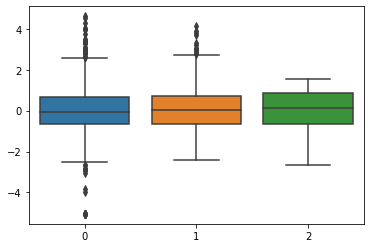

In [62]:
sns.boxplot(data = scaled_data2[:, 3:])

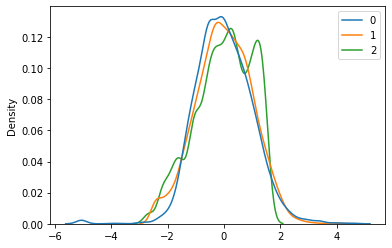

In [63]:
sns.kdeplot(data = scaled_data2[:, 3:])

In [73]:
from sklearn.cluster import KMeans

In [86]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 1000)
kmeans.fit(scaled_data2[:, 3:])

KMeans(n_clusters=3, random_state=1000)

In [87]:
rfm_Df3['segment'] = kmeans.predict(scaled_data2[:, 3:])
rfm_Df3

,Monetary,Frequency,Days,Monetary_log,Frequency_log,Recency_log,segment
CustomerID,,,,,,,
12346.0,0.00,2,325,0.000000,1.098612,5.786897,0
12347.0,4310.00,182,2,8.368925,5.209486,1.098612,2
12348.0,1797.24,31,75,7.494564,3.465736,4.330733,1
12349.0,1757.55,73,18,7.472245,4.304065,2.944439,1
12350.0,334.40,17,310,5.815324,2.890372,5.739793,0
...,...,...,...,...,...,...,...
18280.0,180.60,10,277,5.201806,2.397895,5.627621,0
18281.0,80.82,7,180,4.404522,2.079442,5.198497,0
18282.0,176.60,13,7,5.179534,2.639057,2.079442,1


In [88]:
rfm_Df3.groupby('segment')[['Monetary', 'Frequency', 'Days']].mean()

,Monetary,Frequency,Days
segment,,,
0,258.109219,14.198479,177.204011
1,1025.589862,62.725754,70.651940
2,5629.294486,252.223364,12.173832


Text(0, 0.5, 'Recency')

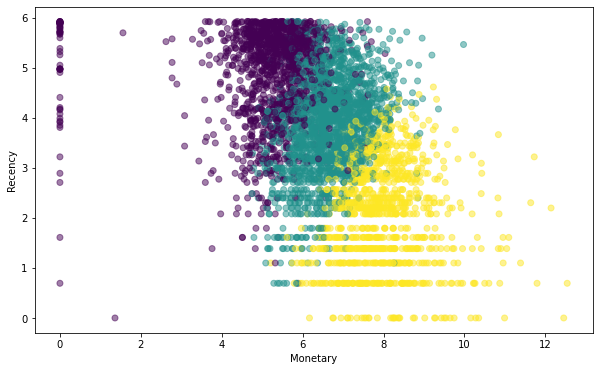

In [89]:
x = rfm_Df3['Monetary_log']
y = rfm_Df3['Recency_log']

plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = rfm_Df3['segment'], alpha = 0.5)

plt.xlabel('Monetary')
plt.ylabel('Recency')

In [100]:
distortions = []

for k in range(1, 11):
  elbowKmeans = KMeans(n_clusters = k, random_state = 1234)
  elbowKmeans.fit(scaled_data2[:, 3:])
  distortions.append(elbowKmeans.inertia_)

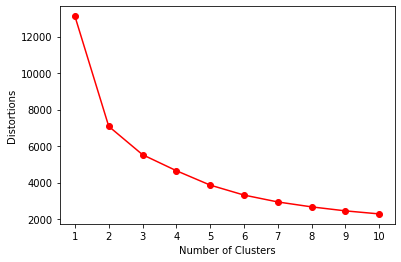

In [105]:
# 격차가 적어지는 순간이 최적. 이 데이터에서는 3~5개의 클러스트가 적당

plt.plot(range(1, 11), distortions, 'ro-')
plt.xticks(range(1, 11))

plt.xlabel('Number of Clusters')
plt.ylabel('Distortions')

plt.show()

In [95]:
from sklearn.metrics import silhouette_score

In [102]:
silhouette_coefficients = []

for k in range(2, 11):
  silhouetteKmeans = KMeans(n_clusters = k, random_state = 1234)
  silhouetteKmeans.fit(scaled_data2[:, 3:])
  score = silhouette_score(scaled_data2[:, 3:], silhouetteKmeans.labels_)
  silhouette_coefficients.append(score)

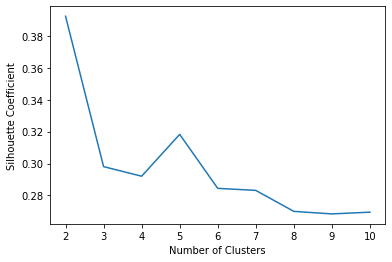

In [104]:
# 1과 가장 가까운 값을 찾아야함. 2는 너무 적은 클러스터의 수 이므로, 5가 가장 최적으로 알 수 있음

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')

plt.show()